In [33]:
import os
import os.path as osp

import pandas as pd
import matplotlib.pyplot as plt

In [35]:
def read_dat_file(path):
    # get column headers
    with open(path, 'r') as f:
        lines = f.readlines()
    for line in reversed(lines):
        if line.startswith('#') and 'Time' in line:
            col_line = line
            break
    colnames = col_line.strip('# \n').split('\t')
    colnames = [colname.strip() for colname in colnames]

    # read the data
    df = pd.read_csv(
        path,
        delim_whitespace=True,
        comment='#',
        header=None,
        names=colnames
    )
    return df


def load_dataset_stats(dataset_path):
    T = 298.15
    NU = -3.400747e-6 + 3.452139e-8*T + 1.00881778e-10*T**2 - 1.363528e-14*T**3
    dat_suffix = "postProcessing/forceCoeffs1/0/coefficient.dat"

    params_naca_4 = ["U_inlet", "AoA", "M", "P", "XX"]
    params_naca_5 = ["U_inlet", "AoA", "L", "P", "Q", "XX"]
    df = []
    for sim_folder in os.listdir(dataset_path):
        if "Init" in sim_folder:
            continue
        if ".json" in sim_folder:
            continue
        configs = sim_folder.split("_")[2:]  # remove first two (airfoil2D, SST)
        is_naca_4 = True if len(configs) == 5 else False
        param_names = params_naca_4 if is_naca_4 else params_naca_5
        row = {}
        for i, param in enumerate(configs):
            row[param_names[i]] = param
        row["is_naca_4"] = is_naca_4
        row["Re"] = float(row["U_inlet"]) / NU

        # load Cd and Cl at the last time step
        # get column headers
        dat_path = osp.join(dataset_path, sim_folder, dat_suffix)
        with open(dat_path, 'r') as f:
            lines = f.readlines()
        for line in reversed(lines):
            if line.startswith('#') and 'Time' in line:
                col_line = line
                break
        colnames = col_line.strip('# \n').split('\t')
        colnames = [colname.strip() for colname in colnames]

        # read the data
        df_coef = pd.read_csv(
            dat_path,
            delim_whitespace=True,
            comment='#',
            header=None,
            names=colnames
        )
        t_end = df_coef[df_coef["Time"] == 20000]
        row["Cl"] = t_end["Cl"].iloc[0]
        row["Cd"] = t_end["Cd"].iloc[0]
        df.append(row)

    return pd.DataFrame(df)

In [36]:
downscaled = load_dataset_stats("/local00/bioinf/airfrans/full_dataset_downscaled")
original = load_dataset_stats("/system/user/publicdata/airfrans/OF_dataset")

/tmp/ipykernel_1469513/4183913271.py:58: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_coef = pd.read_csv(
/tmp/ipykernel_1469513/4183913271.py:58: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_coef = pd.read_csv(
/tmp/ipykernel_1469513/4183913271.py:58: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_coef = pd.read_csv(
/tmp/ipykernel_1469513/4183913271.py:58: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_coef = pd.read_csv(
/tmp/ipykernel_1469513/4183913271.py:58: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='

In [37]:
downscaled

,U_inlet,AoA,L,P,Q,XX,is_naca_4,Re,Cl,Cd,M
0,65.41,1.556,0.844,5.048,0.0,11.641,False,4.220504e+06,0.258707,0.005046,NaN
1,53.247,3.939,NaN,2.169,NaN,8.633,True,3.435701e+06,1.029600,0.006380,5.684
2,84.774,14.053,3.28,5.002,1.0,12.931,False,5.469944e+06,1.621940,0.023988,NaN
3,59.266,-3.994,NaN,2.719,NaN,14.894,True,3.824070e+06,0.077562,0.009604,5.206
4,73.562,9.666,NaN,6.447,NaN,11.081,True,4.746503e+06,1.484338,0.026063,5.064
...,...,...,...,...,...,...,...,...,...,...,...
995,47.759,12.055,NaN,3.807,NaN,6.823,True,3.081594e+06,1.292869,0.087786,6.06
996,43.22,2.151,0.231,7.553,1.0,8.814,False,2.788720e+06,0.269768,0.006614,NaN
997,58.582,2.593,0.722,7.034,0.0,16.194,False,3.779935e+06,0.359738,0.008882,NaN
998,62.893,-0.786,NaN,0.0,NaN,17.071,True,4.058098e+06,-0.086220,0.008509,3.167


In [38]:
original

,U_inlet,AoA,M,P,XX,is_naca_4,Re,Cl,Cd,L,Q
0,77.296,14.133,2.822,1.625,5.329,True,4.987435e+06,1.637760,0.027759,NaN,NaN
1,41.397,8.271,5.385,1.669,5.718,True,2.671093e+06,1.381754,0.014075,NaN,NaN
2,31.468,13.713,3.339,3.51,6.993,True,2.030436e+06,1.622667,0.029291,NaN,NaN
3,67.783,-2.041,4.431,3.865,18.25,True,4.373619e+06,0.212864,0.010283,NaN,NaN
4,49.766,1.946,NaN,3.298,7.238,False,3.211093e+06,0.374654,0.008369,2.435,1.0
...,...,...,...,...,...,...,...,...,...,...,...
995,87.122,9.543,NaN,7.623,18.823,False,5.621446e+06,1.139832,0.015151,1.939,0.0
996,31.677,-0.742,2.926,5.236,5.651,True,2.043922e+06,0.274978,0.008545,NaN,NaN
997,78.374,-1.964,3.817,6.838,11.44,True,5.056991e+06,0.324740,0.008703,NaN,NaN
998,37.159,9.69,NaN,5.832,9.423,False,2.397641e+06,1.107683,0.014104,0.909,0.0


In [39]:
downscaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   U_inlet    1000 non-null   object 
 1   AoA        1000 non-null   object 
 2   L          511 non-null    object 
 3   P          1000 non-null   object 
 4   Q          511 non-null    object 
 5   XX         1000 non-null   object 
 6   is_naca_4  1000 non-null   bool   
 7   Re         1000 non-null   float64
 8   Cl         1000 non-null   float64
 9   Cd         1000 non-null   float64
 10  M          489 non-null    object 
dtypes: bool(1), float64(3), object(7)
memory usage: 79.2+ KB


In [45]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def scatter_plot_coeffs(original, downscaled):
    # Ensure AoA is numeric
    original['AoA'] = pd.to_numeric(original['AoA'], errors='coerce')
    downscaled['AoA'] = pd.to_numeric(downscaled['AoA'], errors='coerce')

    # Clean data
    # original_clean = original[['Re', 'AoA', 'Cl', 'Cd']].dropna()
    # downscaled_clean = downscaled[['Re', 'AoA', 'Cl', 'Cd']].dropna()
    original_clean = original
    downscaled_clean = downscaled

    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

    coeffs = ['Cl', 'Cd']

    for row, coeff in enumerate(coeffs):
        # Original plot
        scatter0 = axes[row, 0].scatter(original_clean['Re'], original_clean['AoA'],
                                        c=original_clean[coeff], cmap='viridis', alpha=0.8)
        axes[row, 0].set_title(f'Original {coeff}')
        axes[row, 0].set_xlabel('Re')
        axes[row, 0].set_ylabel('AoA (°)')
        fig.colorbar(scatter0, ax=axes[row, 0], label=coeff)

        # Downscaled plot
        scatter1 = axes[row, 1].scatter(downscaled_clean['Re'], downscaled_clean['AoA'],
                                        c=downscaled_clean[coeff], cmap='viridis', alpha=0.8)
        axes[row, 1].set_title(f'Downscaled {coeff}')
        axes[row, 1].set_xlabel('Re')
        axes[row, 1].set_ylabel('AoA (°)')
        fig.colorbar(scatter1, ax=axes[row, 1], label=coeff)

        # Calculate absolute error
        merged = pd.merge(original_clean, downscaled_clean, on=['Re', 'AoA'], suffixes=('_orig', '_down'))
        merged[f'{coeff}_error'] = np.abs(merged[f'{coeff}_orig'] - merged[f'{coeff}_down'])

        scatter2 = axes[row, 2].scatter(merged['Re'], merged['AoA'],
                                        c=merged[f'{coeff}_error'], cmap='inferno', alpha=0.8)
        axes[row, 2].set_title(f'Absolute Error {coeff}')
        axes[row, 2].set_xlabel('Re')
        axes[row, 2].set_ylabel('AoA (°)')
        fig.colorbar(scatter2, ax=axes[row, 2], label=f'{coeff} Error')

    plt.tight_layout()
    plt.show()

In [64]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def scatter_plot_coeffs(original, downscaled):
    # Ensure AoA is numeric
    original['AoA'] = pd.to_numeric(original['AoA'], errors='coerce')
    downscaled['AoA'] = pd.to_numeric(downscaled['AoA'], errors='coerce')

    original_clean = original
    downscaled_clean = downscaled

    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

    coeffs = ['Cl', 'Cd']

    for row, coeff in enumerate(coeffs):
        # Original plot
        vmin0, vmax0 = np.percentile(original_clean[coeff], [1, 85])
        scatter0 = axes[row, 0].scatter(original_clean['Re'], original_clean['AoA'],
                                        c=original_clean[coeff], cmap='viridis', alpha=0.8,
                                        vmin=vmin0, vmax=vmax0)
        axes[row, 0].set_title(f'Original {coeff}')
        axes[row, 0].set_xlabel('Re')
        axes[row, 0].set_ylabel('AoA (°)')
        fig.colorbar(scatter0, ax=axes[row, 0], label=coeff)

        # Downscaled plot
        vmin1, vmax1 = np.percentile(downscaled_clean[coeff], [1, 85])
        scatter1 = axes[row, 1].scatter(downscaled_clean['Re'], downscaled_clean['AoA'],
                                        c=downscaled_clean[coeff], cmap='viridis', alpha=0.8,
                                        vmin=vmin1, vmax=vmax1)
        axes[row, 1].set_title(f'Downscaled {coeff}')
        axes[row, 1].set_xlabel('Re')
        axes[row, 1].set_ylabel('AoA (°)')
        fig.colorbar(scatter1, ax=axes[row, 1], label=coeff)

        # Calculate absolute error
        merged = pd.merge(original_clean, downscaled_clean, on=['Re', 'AoA'], suffixes=('_orig', '_down'))
        merged[f'{coeff}_error'] = np.abs(merged[f'{coeff}_orig'] - merged[f'{coeff}_down'])

        vmin2, vmax2 = np.percentile(merged[f'{coeff}_error'], [1, 85])
        scatter2 = axes[row, 2].scatter(merged['Re'], merged['AoA'],
                                        c=merged[f'{coeff}_error'], cmap='inferno', alpha=0.8,
                                        vmin=vmin2, vmax=vmax2)
        axes[row, 2].set_title(f'Absolute Error {coeff}')
        axes[row, 2].set_xlabel('Re')
        axes[row, 2].set_ylabel('AoA (°)')
        fig.colorbar(scatter2, ax=axes[row, 2], label=f'{coeff} Error')

    plt.tight_layout()
    plt.show()


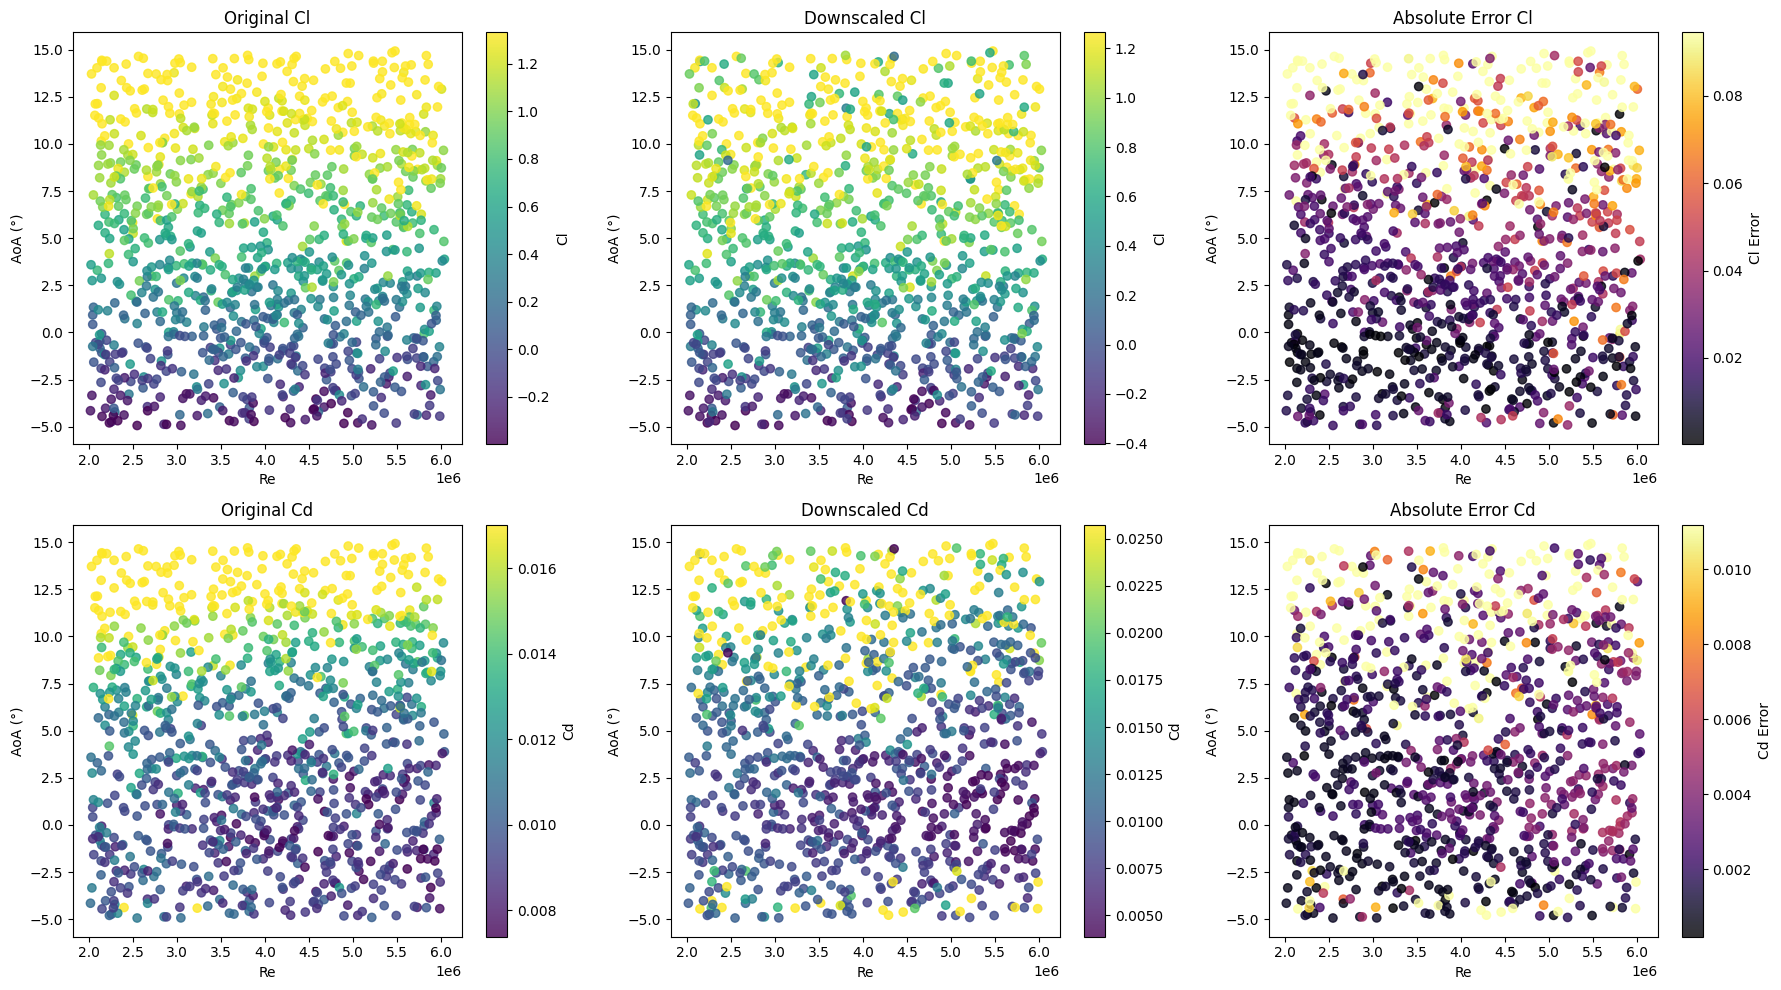

In [65]:
scatter_plot_coeffs(original=original, downscaled=downscaled)

In [49]:
coeff = "Cd"

merged = pd.merge(original, downscaled, on=['Re', 'AoA'], suffixes=('_orig', '_down'))
merged[f'{coeff}_error'] = np.abs(merged[f'{coeff}_orig'] - merged[f'{coeff}_down'])

In [50]:
merged

,U_inlet_orig,AoA,M_orig,P_orig,XX_orig,is_naca_4_orig,Re,Cl_orig,Cd_orig,L_orig,...,U_inlet_down,L_down,P_down,Q_down,XX_down,is_naca_4_down,Cl_down,Cd_down,M_down,Cd_error
0,77.296,14.133,2.822,1.625,5.329,True,4.987435e+06,1.637760,0.027759,NaN,...,77.296,NaN,1.625,NaN,5.329,True,1.069356,0.255723,2.822,0.227963
1,41.397,8.271,5.385,1.669,5.718,True,2.671093e+06,1.381754,0.014075,NaN,...,41.397,NaN,1.669,NaN,5.718,True,1.373147,0.015234,5.385,0.001159
2,31.468,13.713,3.339,3.51,6.993,True,2.030436e+06,1.622667,0.029291,NaN,...,31.468,NaN,3.51,NaN,6.993,True,0.876974,0.184918,3.339,0.155628
3,67.783,-2.041,4.431,3.865,18.25,True,4.373619e+06,0.212864,0.010283,NaN,...,67.783,NaN,3.865,NaN,18.25,True,0.213161,0.009228,4.431,0.001055
4,49.766,1.946,NaN,3.298,7.238,False,3.211093e+06,0.374654,0.008369,2.435,...,49.766,2.435,3.298,1.0,7.238,False,0.385780,0.005708,NaN,0.002661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,87.122,9.543,NaN,7.623,18.823,False,5.621446e+06,1.139832,0.015151,1.939,...,87.122,1.939,7.623,0.0,18.823,False,1.235163,0.011060,NaN,0.004091
996,31.677,-0.742,2.926,5.236,5.651,True,2.043922e+06,0.274978,0.008545,NaN,...,31.677,NaN,5.236,NaN,5.651,True,0.280149,0.007337,2.926,0.001208
997,78.374,-1.964,3.817,6.838,11.44,True,5.056991e+06,0.324740,0.008703,NaN,...,78.374,NaN,6.838,NaN,11.44,True,0.350853,0.005374,3.817,0.003328
998,37.159,9.690,NaN,5.832,9.423,False,2.397641e+06,1.107683,0.014104,0.909,...,37.159,0.909,5.832,0.0,9.423,False,0.714519,0.044795,NaN,0.030691


In [4]:
sims = (os.listdir(dataset_path))
len(sims)

1001

In [5]:
import json

json_path = "/system/user/publicwork/setinek/scaling_laws/manifest.json"
with open(json_path, 'r') as file:
    data = json.load(file)
full_dataset = data["full_train"] + data["full_test"]
print(f"Length of the full dataset: {len(full_dataset)}")
missing = list(set(full_dataset) - set(sims))
print(f"Number of missing simulations: {len(missing)}")

Length of the full dataset: 1000
Number of missing simulations: 0


In [6]:
print("Missing simulations:", missing)

Missing simulations: []


In [7]:
too_many = list(set(sims) - set(full_dataset))

In [8]:
too_many

['airFoil2DInit']